# Import all nercessary libraries 

In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import math
from skimage.transform import resize
from skimage import io
from sklearn import svm
import sklearn
from sklearn.decomposition import PCA

## getFeature function used to get features of an image

In [2]:
##Inputs: img, the image to get features for. label, the class the img belongs to, note that class defaults to 0
def getFeature(img,label=0):
    img=resize(img, (27,27))
    Matrix=img.reshape(-1,3).reshape(1,-1)
    Matrix=np.append (Matrix,[label])
    return Matrix

## Metric function is used to calculate the distance of two vector points

In [3]:
def metric(q):
    dist=np.sum((x_train[:,:-1]-q)**2,axis=1)
    return np.sqrt(dist)

## get data Fuction used to get images and represent them using it's fearture

In [4]:
def getData(path1,path2):
    benign= io.imread_collection(path1)
    malignant = io.imread_collection(path2)
    data=[]
    for i in benign:
        data.append(getFeature(i))
    for i in malignant:
        data.append(getFeature(i,1))
    return data


## K- Nearest Neighbor Algorithm

In [5]:
def kn(q,k):
    dista=metric(q)
    #sort
    idx=np.argsort(dista)
    dista=dista[idx]
    neigh=x_train[idx]
       
    return dista[:k],neigh[:k,-1].astype(int)

## Classifying function using KNN ouput

In [6]:
def classify(q,k):
    d,l=kn(q,k)
    
    ones=np.count_nonzero(l==1)
    zeros=np.count_nonzero(l==0)
    
    if ones>zeros:
        return 1
    else:
        return 0

## get training data using the getData fucntion and preprocesss data

In [7]:
path1train='train/benign/*.jpg'
path2train='train/malignant/*.jpg'
training=getData(path1train,path2train)

## get testing data using the getData fucntion and preprocesss data

In [308]:
path1test='test/benign/*.jpg'
path2test='test/malignant/*.jpg'
testing=getData(path1test,path2test)

## Get acccuracy for training and testing data

In [309]:
def train_test(k):
    c=0
    for q in x_train:
        l=q[-1]
        q=q[:-1]
        
        p=classify(q,k)
        
        if p==l:
            c=c+1
            
    return c/len(x_train)
def test(k):
    c=0
    for q in x_test:
        l=q[-1]
        q=q[:-1]
        
        p=classify(q,k)
        
        if p==l:
            c=c+1
            
    return c/len(x_test)

## print accuracy for training data to pick best K

In [310]:
x_train=np.array(training)
x_test=np.array(testing)

k_list=[3,5,7]
for i in k_list:
    acc=train_test(i) 
    print("For K equals ",i," accuracy: ",acc)


For K equals  3  accuracy:  0.8729135053110774
For K equals  5  accuracy:  0.834597875569044
For K equals  7  accuracy:  0.8076631259484067


## Run KNN for best K which is 3

In [329]:
    acc=test(3) 
    print("For K equals ",3," accuracy: ",acc)

For K equals  3  accuracy:  0.7833333333333333


## Append all ones as feature for bias term

In [312]:
def append_ones(x):
    x = np.hstack((np.ones((x.shape[0],1)), x))
    return x

## Normalization parameters 

In [313]:
def normalization_parameters(x):
    mu = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return mu, std

## Normalize features

In [314]:
def normalize_features(x, mu, std):
    x = (x - mu) / (std + 1e-8)
    return x

## Logistic regression model

In [315]:
def f(x, theta):
    y = 1.0/(1.0 + np.exp(-np.dot(x, theta)))
    return y

In [316]:
def predict(x, theta, h, threshold=0.50):
    y = h(x, theta)
    y = (y>threshold) * 1
    return y

## Batch gradient descent learning

In [317]:
def learn(x, y, theta, h, alpha = 0.1, epsilon=0.001, t_max=2000):
    t = 1
    J = []
    N = x.shape[0]
    while True:
        e = (h(x, theta) - y)
        J.append(1.0/(2*N) * np.sum(e**2))
        x_e = (x * e)
        theta_ = theta.copy()
        theta = theta - alpha * np.mean(x_e, axis=0)[:,np.newaxis]
        if t > t_max:
            break
        t = t + 1
    return theta, J

## Load data & learn the parameters of the model

In [318]:
mu, std = normalization_parameters(x_train[:,:-1])
x_train_norm = normalize_features(x_train[:,:-1], mu, std)
x_test_norm = normalize_features(x_test[:,:-1], mu, std)
x_train_norm_aug = append_ones(x_train_norm)
x_test_norm_aug = append_ones(x_test_norm)

In [319]:
alpha = 0.01
y_train=x_train[:,-1].astype(int)
y_train=y_train[:,np.newaxis]
y_test=x_test[:,-1].astype(int)
y_test=y_test[:,np.newaxis]
theta_initial = np.zeros((x_train_norm_aug.shape[1],1))
theta_learned, J = learn(x_train_norm_aug,y_train, theta_initial, f, alpha=alpha)

## Plot the cost function

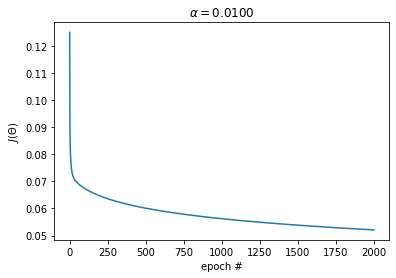

In [320]:
plt.figure()
plt.plot(np.arange(len(J)), J)
plt.xlabel('epoch #')
plt.ylabel(r'$J(\Theta)$')
plt.title(r'$\alpha={:.4f}$'.format(alpha));

## Compute train and test Accuracy

In [321]:
y_train_predicted = predict(x_train_norm_aug, theta_learned, f)
y_test_predicted = predict(x_test_norm_aug, theta_learned, f)

In [322]:
def Acc(pred,act):
    cc=0
    for i in range(0, len(pred)):
        if(pred[i]==act[i]):
            cc+=1
    return cc/len(pred)

In [331]:
sklearn.metrics.confusion_matrix(y_test,y_test_predicted)

array([[289,  71],
       [ 62, 238]])

In [323]:
print("Accuracy for training data = {:.3f}".format(Acc(y_train_predicted,y_train)))
print("Accuracy for test data = {:.3f}".format(Acc(y_test_predicted,y_test)))

Accuracy for training data = 0.846
Accuracy for test data = 0.794


## Support vector machine
### Compute train and test Accuracy

In [337]:
clf = svm.LinearSVC(dual = False)
clf.fit(x_train[:,:-1],np.ravel(y_train))
y_train_predicted= clf.predict(x_train[:,:-1])
y_test_predicted = clf.predict(x_test[:,:-1])

print("Accuracy for training data = {:.3f}".format(Acc(y_train_predicted,y_train)))
print("Accuracy for test data = {:.3f}".format(Acc(y_test_predicted,y_test)))

Accuracy for training data = 0.930
Accuracy for test data = 0.785


In [338]:
sklearn.metrics.confusion_matrix(y_test,y_test_predicted)

array([[292,  68],
       [ 74, 226]])

## Princle Componet Analysis 
### dimention reduction

In [325]:
pca=PCA(n_components=200)
pca.fit(x_train[:,:-1])
xtrain_pca=pca.transform(x_train[:,:-1])
xtest_pca=pca.transform(x_test[:,:-1])

### Compute train and test Accuracy for SVM

In [326]:
clf.fit(xtrain_pca,y)
y_train_predicted= clf.predict(xtrain_pca)
y_test_predicted = clf.predict(xtest_pca)

print("Accuracy for training data = {:.3f}".format(Acc(y_train_predicted,y_train)))
print("Accuracy for test data = {:.3f}".format(Acc(y_test_predicted,y_test)))

Accuracy for training data = 0.842
Accuracy for test data = 0.795


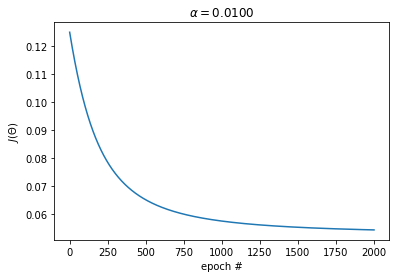

In [327]:
mu, std = normalization_parameters(xtrain_pca)
x_train_norm = normalize_features(xtrain_pca, mu, std)
x_test_norm = normalize_features(xtest_pca, mu, std)
x_train_norm_aug = append_ones(x_train_norm)
x_test_norm_aug = append_ones(x_test_norm)

alpha = 0.01
y_train=x_train[:,-1].astype(int)
y_train=y_train[:,np.newaxis]
y_test=x_test[:,-1].astype(int)
y_test=y_test[:,np.newaxis]
theta_initial = np.zeros((x_train_norm_aug.shape[1],1))
theta_learned, J = learn(x_train_norm_aug,y_train, theta_initial, f, alpha=alpha)

plt.figure()
plt.plot(np.arange(len(J)), J)
plt.xlabel('epoch #')
plt.ylabel(r'$J(\Theta)$')
plt.title(r'$\alpha={:.4f}$'.format(alpha));

In [334]:
y_train_predicted = predict(x_train_norm_aug, theta_learned, f)
y_test_predicted = predict(x_test_norm_aug, theta_learned, f)

print("Accuracy for training data = {:.3f}".format(Acc(y_train_predicted,y_train)))
print("Accuracy for test data = {:.3f}".format(Acc(y_test_predicted,y_test)))

Accuracy for training data = 0.841
Accuracy for test data = 0.798


In [336]:
sklearn.metrics.confusion_matrix(y_test,y_test_predicted)

array([[289,  71],
       [ 62, 238]])